<a href="https://colab.research.google.com/github/udaybhaskar717/Solar-Irradiance-Forecasting/blob/main/GHI_POA_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pvlib

In [ ]:
from pvlib import location
from pvlib import irradiance
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# data=pd.read_csv('/content/drive/MyDrive/Bhadla_Solcast/PredictedGHI.csv')
data=pd.read_csv('/content/drive/MyDrive/IITB_Floating_Solar_Plant/IITB_PredictedGHI.csv')

In [ ]:
# data.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
data

,Unnamed: 0,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date,Predicted
0,245566,24.2,-110,48.4,15.6,0,0,0,30.3,58.9,1045.5,65,3.5,105,0.11,2022-01-01 06:00:00+05:30,0.108439
1,245567,24.1,-111,24.6,15.6,0,0,0,30.4,59.0,1045.6,66,3.5,101,0.11,2022-01-01 06:15:00+05:30,0.108439
2,245568,24.1,-112,22.4,15.6,0,0,0,30.5,59.1,1045.8,65,3.6,98,0.11,2022-01-01 06:30:00+05:30,0.108439
3,245569,24.1,-113,6.5,15.7,0,0,0,30.6,59.3,1046.0,64,3.6,95,0.11,2022-01-01 06:45:00+05:30,0.108439
4,245570,24.1,-114,17.6,15.7,0,0,0,30.7,59.4,1046.2,63,3.6,92,0.11,2022-01-01 07:00:00+05:30,0.108439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33976,279542,25.1,-105,0.1,13.7,0,0,0,21.0,49.1,1039.0,83,2.6,131,0.11,2022-12-21 04:00:00+05:30,0.108439
33977,279543,25.1,-105,0.0,13.5,0,0,0,21.0,48.6,1039.0,85,2.7,127,0.11,2022-12-21 04:15:00+05:30,0.108439
33978,279544,25.0,-106,0.0,13.3,0,0,0,21.1,48.2,1039.1,86,2.7,124,0.11,2022-12-21 04:30:00+05:30,0.108439
33979,279545,25.0,-107,0.0,13.1,0,0,0,21.1,47.7,1039.2,85,2.7,120,0.11,2022-12-21 04:45:00+05:30,0.108439


In [ ]:
data['Date']=pd.to_datetime(data['Date'],utc=True)

In [ ]:
data.set_index("Date",inplace=True)

In [ ]:
data

,Unnamed: 0,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Predicted
Date,,,,,,,,,,,,,,,,
2022-01-01 00:30:00+00:00,245566,24.2,-110,48.4,15.6,0,0,0,30.3,58.9,1045.5,65,3.5,105,0.11,0.108439
2022-01-01 00:45:00+00:00,245567,24.1,-111,24.6,15.6,0,0,0,30.4,59.0,1045.6,66,3.5,101,0.11,0.108439
2022-01-01 01:00:00+00:00,245568,24.1,-112,22.4,15.6,0,0,0,30.5,59.1,1045.8,65,3.6,98,0.11,0.108439
2022-01-01 01:15:00+00:00,245569,24.1,-113,6.5,15.7,0,0,0,30.6,59.3,1046.0,64,3.6,95,0.11,0.108439
2022-01-01 01:30:00+00:00,245570,24.1,-114,17.6,15.7,0,0,0,30.7,59.4,1046.2,63,3.6,92,0.11,0.108439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-20 22:30:00+00:00,279542,25.1,-105,0.1,13.7,0,0,0,21.0,49.1,1039.0,83,2.6,131,0.11,0.108439
2022-12-20 22:45:00+00:00,279543,25.1,-105,0.0,13.5,0,0,0,21.0,48.6,1039.0,85,2.7,127,0.11,0.108439
2022-12-20 23:00:00+00:00,279544,25.0,-106,0.0,13.3,0,0,0,21.1,48.2,1039.1,86,2.7,124,0.11,0.108439


In [ ]:
data.index

DatetimeIndex(['2022-01-01 00:30:00+00:00', '2022-01-01 00:45:00+00:00',
               '2022-01-01 01:00:00+00:00', '2022-01-01 01:15:00+00:00',
               '2022-01-01 01:30:00+00:00', '2022-01-01 01:45:00+00:00',
               '2022-01-01 02:00:00+00:00', '2022-01-01 02:15:00+00:00',
               '2022-01-01 02:30:00+00:00', '2022-01-01 02:45:00+00:00',
               ...
               '2022-12-20 21:15:00+00:00', '2022-12-20 21:30:00+00:00',
               '2022-12-20 21:45:00+00:00', '2022-12-20 22:00:00+00:00',
               '2022-12-20 22:15:00+00:00', '2022-12-20 22:30:00+00:00',
               '2022-12-20 22:45:00+00:00', '2022-12-20 23:00:00+00:00',
               '2022-12-20 23:15:00+00:00', '2022-12-20 23:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=33981, freq=None)

In [ ]:
data['Zenith']=data['Zenith'].apply(float)

In [ ]:
erbs = pvlib.irradiance.erbs(
    ghi=data['Predicted'],
    zenith=data['Zenith'],
    datetime_or_doy=data.index)

erbs.columns

Index(['dni', 'dhi', 'kt'], dtype='object')

In [ ]:
erbs 

,dni,dhi,kt
Date,,,
2022-01-01 00:30:00+00:00,0.0,0.108439,0.001180
2022-01-01 00:45:00+00:00,0.0,0.108439,0.001180
2022-01-01 01:00:00+00:00,0.0,0.108439,0.001180
2022-01-01 01:15:00+00:00,0.0,0.108439,0.001180
2022-01-01 01:30:00+00:00,0.0,0.108439,0.001180
...,...,...,...
2022-12-20 22:30:00+00:00,0.0,0.108439,0.001181
2022-12-20 22:45:00+00:00,0.0,0.108439,0.001181
2022-12-20 23:00:00+00:00,0.0,0.108439,0.001181


In [ ]:
# data['Date']=pd.to_datetime(data['PeriodStart'])
# data.drop(['PeriodEnd','PeriodStart','Period','GtiTracking','GtiFixedTilt'],axis=1,inplace=True)
# data['Date']=data.Date.dt.tz_convert('Asia/Kolkata')

In [ ]:
# data17_20=data[(data.Date.dt.year >2016) & (data.Date.dt.year<2021)]
# validation_data=data[data.Date.dt.year==2021]

In [ ]:
# data17_20.drop('SnowWater',axis=1,inplace=True)
# validation_data.drop('SnowWater',axis=1,inplace=True)

In [ ]:
def get_irradiance(data, tilt=18.3, surface_azimuth=180):
    POA_irradiance = irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=surface_azimuth,
        dni=erbs['dni'],
        ghi=data['Predicted'],
        dhi=erbs['dhi'],
        solar_zenith=data['Zenith'],
        solar_azimuth=data['Azimuth'])
    # Return DataFrame with only GHI and POA
    return pd.DataFrame({'GHI': data['Predicted'],
                         'POA': POA_irradiance['poa_global']
                         })

In [ ]:
df_poa=get_irradiance(data)

In [ ]:
df_poa['Date']=data.index

In [ ]:
data['POA']=df_poa['POA']

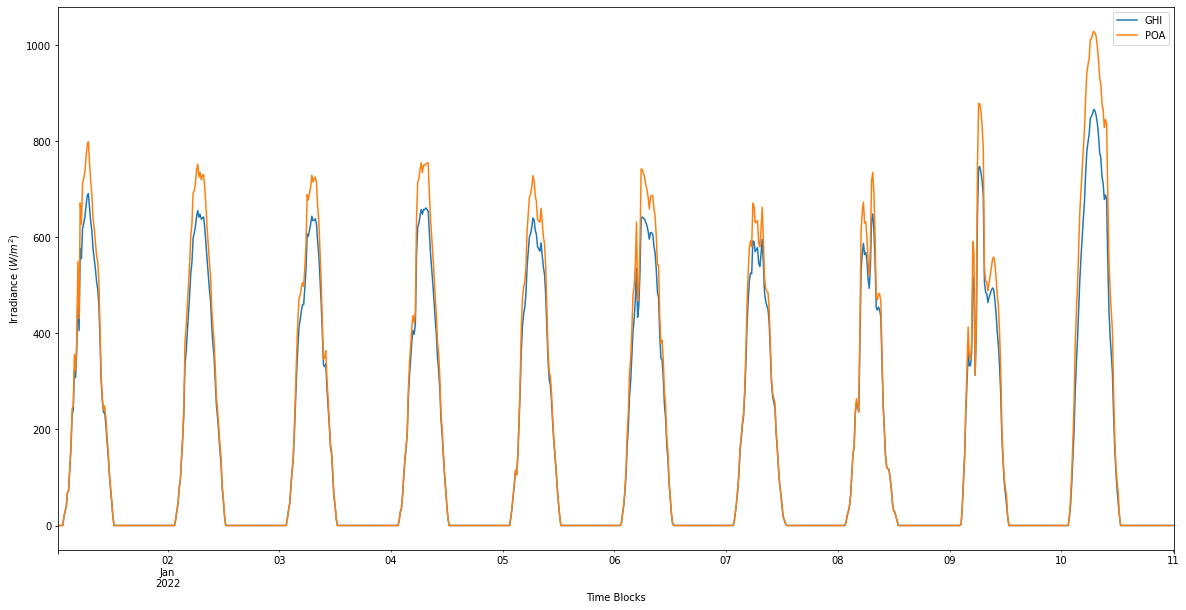

In [ ]:
fig, ax1 = plt.subplots(1,1, sharey=True,figsize=(20,10))
df_poa['GHI'][0:96*10].plot(ax=ax1, label='GHI')
# df_poa.set_index('Date')[['GHI','POA']].iloc[96*0:96*4,:].plot(figsize=(15,6))
# df_poa.set_index('Date')[['Predicted','Actual']].iloc[0:96*10,:].plot(figsize=(15,6))
df_poa['POA'][0:96*10].plot(ax=ax1, label='POA')
plt.xlabel('Time Blocks')
plt.ylabel('Irradiance ($W/m^2$)')
plt.legend()
plt.show()

# This is because, in winter, the sun is much lower in the sky, so a tilted array will be at a more optimal angle compared to a flat array. In summer, the sun gets much higher in the sky, and there is very little gain for a tilted array compared to a flat array.

In [ ]:
data.head(20)

,Unnamed: 0,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Predicted,POA
Date,,,,,,,,,,,,,,,,,
2022-01-01 00:30:00+00:00,245566,24.2,-110,48.4,15.6,0,0,0,30.3,58.9,1045.5,65,3.5,105.0,0.11,0.108439,0.106382
2022-01-01 00:45:00+00:00,245567,24.1,-111,24.6,15.6,0,0,0,30.4,59.0,1045.6,66,3.5,101.0,0.11,0.108439,0.106382
2022-01-01 01:00:00+00:00,245568,24.1,-112,22.4,15.6,0,0,0,30.5,59.1,1045.8,65,3.6,98.0,0.11,0.108439,0.106382
2022-01-01 01:15:00+00:00,245569,24.1,-113,6.5,15.7,0,0,0,30.6,59.3,1046.0,64,3.6,95.0,0.11,0.108439,0.106382
2022-01-01 01:30:00+00:00,245570,24.1,-114,17.6,15.7,0,0,0,30.7,59.4,1046.2,63,3.6,92.0,0.11,0.108439,0.106382
2022-01-01 01:45:00+00:00,245571,24.1,-115,19.9,15.7,8,0,0,30.7,59.5,1046.4,61,3.6,88.0,0.11,18.836622,18.479377
2022-01-01 02:00:00+00:00,245572,24.1,-117,19.6,15.7,28,0,0,30.8,59.6,1046.6,61,3.6,85.0,0.11,29.226880,29.753119
2022-01-01 02:15:00+00:00,245573,24.2,-118,30.7,15.8,47,0,0,30.8,59.5,1046.8,62,3.7,82.0,0.11,39.312740,39.290654
2022-01-01 02:30:00+00:00,245574,24.2,-119,37.2,15.8,69,0,0,30.9,59.4,1047.0,62,3.7,79.0,0.11,68.249405,68.377146


In [ ]:
data.drop("Unnamed: 0",axis=1).to_csv("/content/drive/MyDrive/IITB_Floating_Solar_Plant/POA.csv")